<a href="https://colab.research.google.com/github/Avik-G/EDA-Play-Store-Review-Analysis-/blob/main/EDA_Project_Google_Play_Store_Review_Data_Avik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading The Data Files**

In [2]:
path = "/content/drive/MyDrive/DS/EDA/Data/"

PS_df = pd.read_csv(path + 'Copy of Play Store Data.csv')
UR_df = pd.read_csv(path + 'Copy of User Reviews.csv')

Checking for Data Types and Format

In [3]:
PS_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
UR_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
PS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
UR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [7]:
PS_df.shape

(10841, 13)

In [8]:
UR_df.shape

(64295, 5)

# **Data Cleaning**


 Calculating total Null Values in Play Store Data

In [9]:
def playstoreinfo():
  temp=pd.DataFrame(index = PS_df.columns)
  temp["datatype"] = PS_df.dtypes
  temp["not null values"] = PS_df.count()
  temp["null value"] = PS_df.isnull().sum()
  temp["% of the null value"] = PS_df.isnull().mean()
  temp["unique count"] = PS_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


The columns of Rating, Type, Content Rating, Current Ver and Android Ver have Null Values out of which only the Rating Null Values are a significant portion of the Data Set. Thus we can drop the null values rows from all columns except Rating

Removing Null Values from PS_df except Ratings Column

In [10]:
PS_df = PS_df[PS_df['Android Ver'].notna()]
PS_df = PS_df[PS_df['Content Rating'].notna()]
PS_df = PS_df[PS_df['Current Ver'].notna()]
PS_df = PS_df[PS_df['Type'].notna()]

In [11]:
def playstoreinfo():
  temp=pd.DataFrame(index = PS_df.columns)
  temp["datatype"] = PS_df.dtypes
  temp["not null values"] = PS_df.count()
  temp["null value"] = PS_df.isnull().sum()
  temp["% of the null value"] = PS_df.isnull().mean()
  temp["unique count"] = PS_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10829,0,0.000000,9648
Category,object,10829,0,0.000000,33
Rating,float64,9360,1469,0.135654,39
Reviews,object,10829,0,0.000000,5999
Size,object,10829,0,0.000000,457
Installs,object,10829,0,0.000000,20
Type,object,10829,0,0.000000,2
Price,object,10829,0,0.000000,92
Content Rating,object,10829,0,0.000000,6
Genres,object,10829,0,0.000000,119


13.5% of values in Rating Column is missing

In [12]:
# Checking for any outliers in Rating Column
PS_df[PS_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no outlier in Rating Column

**Working with the Rating Data:** In order to find a suitable value to replace the Null Values, some exploratory plots are done.

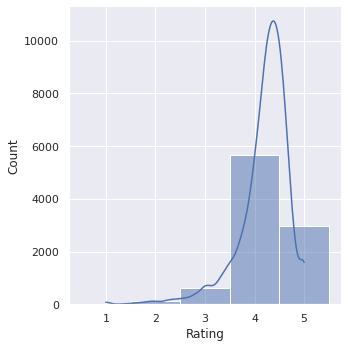

In [13]:
# Distribution of Data in Rating Column
Review_data = PS_df["Rating"]
sns.set(rc = {'figure.figsize':(12,7)})
sns.displot(Review_data, discrete = True, kde = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


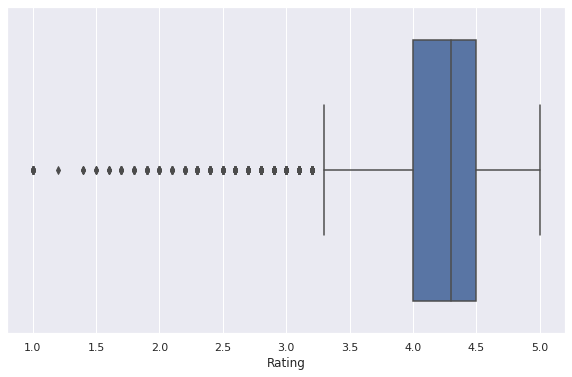

In [14]:
# Box Plot of Data in Rating Column
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(Review_data)

In [15]:
# Skewness of Rating Data
PS_df['Rating'].skew()

-1.8501346146929738

As observed from the above plots and subsequent Skew readings, the data is higly left skewed.



Thus the missing values should be replaced with Median or Mode and not Mean values.


In [16]:
# Finding Meadian & Mode Values of Rating Column
PS_df_rating_median = PS_df["Rating"].median()
print('Median Value of Rating Data: ' ,PS_df_rating_median)
PS_df_rating_mode = PS_df["Rating"].mode()
print('Mode Value of Rating Data: ', PS_df_rating_mode)

Median Value of Rating Data:  4.3
Mode Value of Rating Data:  0    4.4
dtype: float64


As the values of Median and Mode are differentiatied by a value of 0.1, any one of them can be used. 

I select **Median Value** to replace missing values in Rating Column

In [17]:
PS_df["Rating"].fillna(value = PS_df_rating_median, inplace = True)

In [18]:
PS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


There are no Null Values in the Data Set

## **Checking for Duplicate Values in APP Column**

Checking for unique counts of App Names

In [19]:
PS_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9648, dtype: int64

In [20]:
PS_df[PS_df['App']== 'ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


It is observed that some Apps like ESPN, ROBLOX, Candy Crush Saga, etc have multiple entries with subsequent same data in all rows.

These duplicated need to be removed

In [21]:
PS_df.drop_duplicates(subset= 'App', inplace = True)

In [22]:
PS_df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
KineMaster – Pro Video Editor                     1
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9648, dtype: int64

There are no duplicates in the data set

# **Data Manipulation**

 It is required to convert other columns from dtype ***Object*** to ***Integer*** or **Float**, as to further develop meaningful insights to the data

1. Changing Price from String to Float.

In attempts to change the dtype directly, a '$' string has restricted from using astype functions to change the dtype. Thus a function is to be created to complete the process

In [23]:
def dollar_to_float(p):
  if '$' in p:
    return float(p[1:])
  else:
    return float(p)

In [24]:
PS_df['Price'] = PS_df['Price'].apply(lambda x: dollar_to_float(x))

PS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Price colum has dtype Float64

Similarly; Reviews, Size & Installs Columns also need to be converted to usable dtypes

In [25]:
#Convert Reviews to INT

PS_df['Reviews'] = PS_df['Reviews'].astype(int)
PS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [26]:
# Convert Installs to INT

def remove_and_convert(I):
  if '+' and ',' in I:
    new_value = int(I[:-1].replace(',',''))
    return new_value
  elif '+' in I:
    new_val = int(I[:-1])
    return new_val
  else:
    return int(I)

PS_df['Installs'] = PS_df['Installs'].apply(lambda x: remove_and_convert(x))

PS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [27]:
# Convert Size to Float [1 MB has 1024 KB thus 1 KB =1/1024 MB]

def KB_to_MB_converter(S):
  try:
    if 'M' in S:
      return float(S[:-1])
    elif 'k' in S:
      return round(float(S[:-1])/1024, 4)
    else:
      return S
  except:
    return S


PS_df['Size'] = PS_df['Size'].apply(lambda x: KB_to_MB_converter(x))
PS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


Even after defining a function, the Size column still shows dtype as Object and not Float

A possible explanation could be existence of string objects in the Column data other than 'M' or 'k'. The strings 'Varies with device' is replaced with 'NaN' and the column is converted to a float.

In [28]:
PS_df['Size'] = PS_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
PS_df['Size'] = PS_df['Size'].apply(lambda x: float(x))

In [29]:
PS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            8422 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [30]:
def playstoreinfo():
  temp=pd.DataFrame(index = PS_df.columns)
  temp["datatype"] = PS_df.dtypes
  temp["not null values"] = PS_df.count()
  temp["null value"] = PS_df.isnull().sum()
  temp["% of the null value"] = PS_df.isnull().mean()
  temp["unique count"] = PS_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,9648,0,0.000000,9648
Category,object,9648,0,0.000000,33
Rating,float64,9648,0,0.000000,39
Reviews,int64,9648,0,0.000000,5328
Size,float64,8422,1226,0.127073,455
Installs,int64,9648,0,0.000000,20
Type,object,9648,0,0.000000,2
Price,float64,9648,0,0.000000,92
Content Rating,object,9648,0,0.000000,6
Genres,object,9648,0,0.000000,118


As suspected, there are new null values in Size Column which need to be replaced as 12% of total data is a significant number.

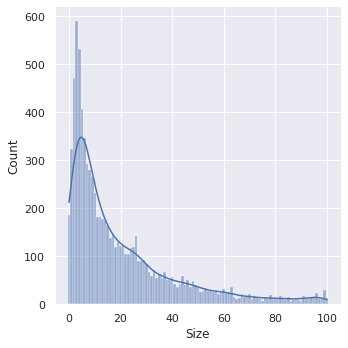

In [31]:
# Distribution of Size Data
Size_data = PS_df["Size"]
sns.set(rc = {'figure.figsize':(20,10)})
sns.displot(Size_data, discrete = True, kde = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


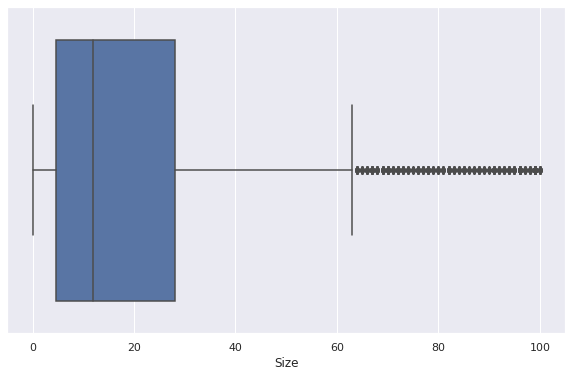

In [32]:
# Box Plot of Size Data
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(Size_data)

In [33]:
# Skew of Size Data
PS_df['Size'].skew()

1.6444319074719538

Again replacing Null Values in Size Data with Median values

In [34]:
# Finding Meadian & Mode Values of Size Column and Replacing with Median
PS_df_Size_median = PS_df["Size"].median()
print('Median Value of Size Data: ' ,PS_df_Size_median)
PS_df_Size_mode = PS_df["Size"].mode()
print('Mode Value of Size Data: ', PS_df_Size_mode)

PS_df["Size"].fillna(value = PS_df_Size_median, inplace = True)

Median Value of Size Data:  12.0
Mode Value of Size Data:  0    11.0
1    12.0
dtype: float64


In [35]:
def playstoreinfo():
  temp=pd.DataFrame(index = PS_df.columns)
  temp["datatype"] = PS_df.dtypes
  temp["not null values"] = PS_df.count()
  temp["null value"] = PS_df.isnull().sum()
  temp["% of the null value"] = PS_df.isnull().mean()
  temp["unique count"] = PS_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,9648,0,0.0,9648
Category,object,9648,0,0.0,33
Rating,float64,9648,0,0.0,39
Reviews,int64,9648,0,0.0,5328
Size,float64,9648,0,0.0,455
Installs,int64,9648,0,0.0,20
Type,object,9648,0,0.0,2
Price,float64,9648,0,0.0,92
Content Rating,object,9648,0,0.0,6
Genres,object,9648,0,0.0,118


# **Exploratory Analysis**
Now, as there are no Null values in the entire data, we can begin analysis

In [36]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = PS_df[PS_df['Size'] != 'Varies with device']['Size'].max()

min_size = PS_df[PS_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(PS_df[PS_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = PS_df[PS_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 19.3444, 12.0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


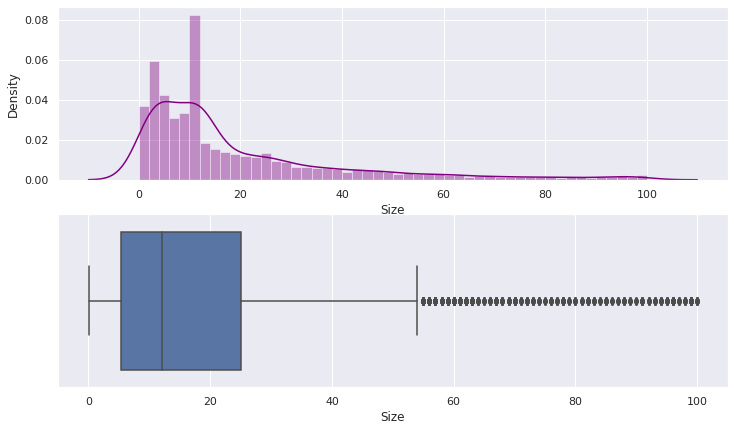

In [37]:
# Distplot
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(PS_df['Size'], color='purple', ax=ax[0])
sns.boxplot(x='Size',data=PS_df, ax=ax[1])

In [ ]:
_skew_ = PS_df[PS_df['Size'] != 'Varies with device']['Size'].skew()
print(_skew_)

1.8586162045153811


The size column data shows that majority of apps have a size of 10 to 20 MB and overall tend to be medium sized. 

In [38]:
PS_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9648.00000,9.648000e+03,9648.000000
mean,4.192465,2.168369e+05,19.34442,7.786211e+06,1.100193
std,0.496552,1.832349e+06,20.59058,5.378830e+07,16.861727
min,1.000000,0.000000e+00,0.00830,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.30000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.00000,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,25.00000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.00000,1.000000e+09,400.000000


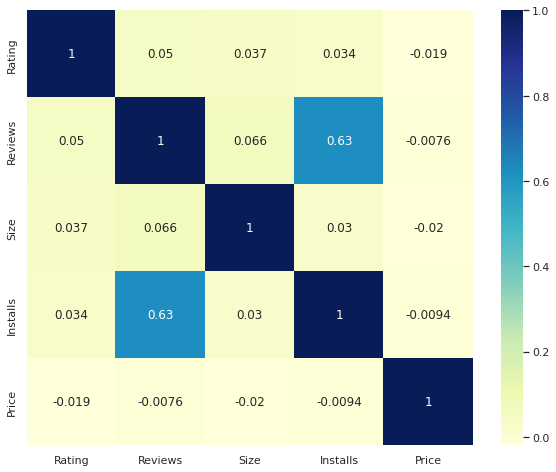

In [42]:
corr_data = PS_df.corr(method = 'pearson')
plt.figure(figsize = (10,8))
dataplot = sns.heatmap(corr_data, cmap="YlGnBu", annot=True)
plt.show()

From Correlation plot,it is seen that there is some correlation between Number of Installs to Number of Reviews. It can be said that as the number of Installs increases, the chance of users providing reviews increases.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

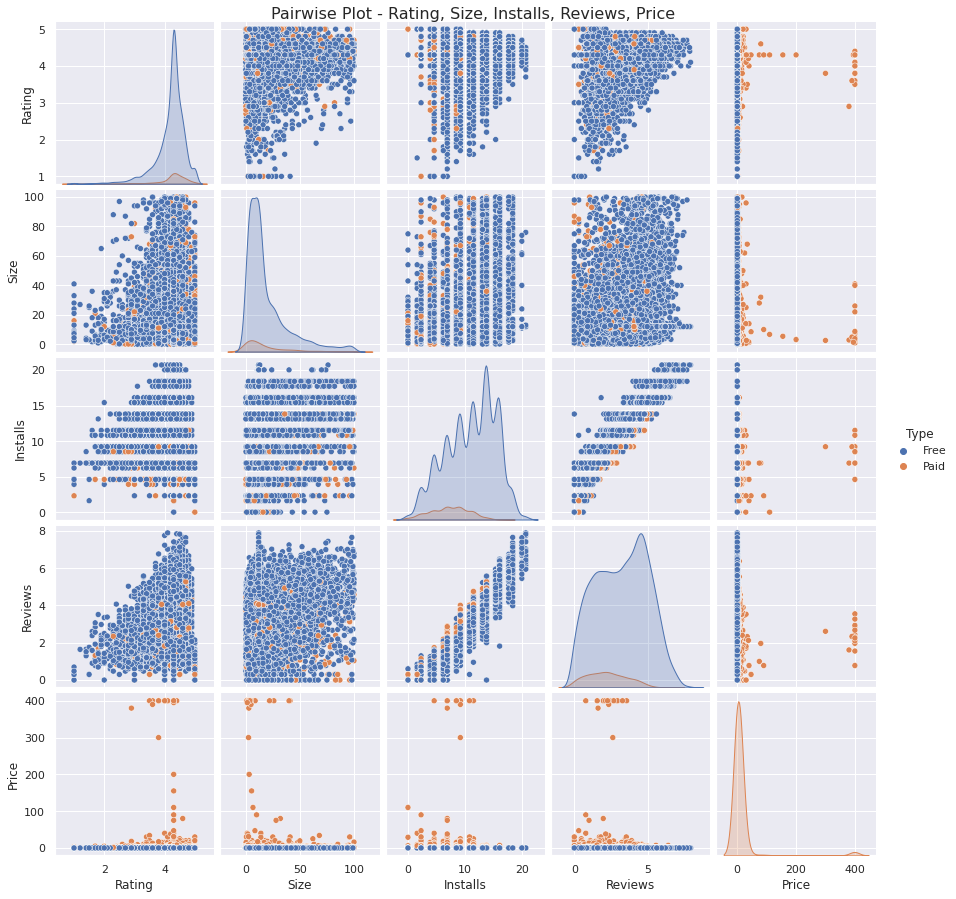

In [43]:
Rating = PS_df['Rating']
Size = PS_df['Size']
Installs = PS_df['Installs']
Reviews = PS_df['Reviews']
Type = PS_df['Type']
Price = PS_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

## Sizing Strategy: Relation between Size of Apps to Ratings & Installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.02, 'Rating vs Size of Apps')

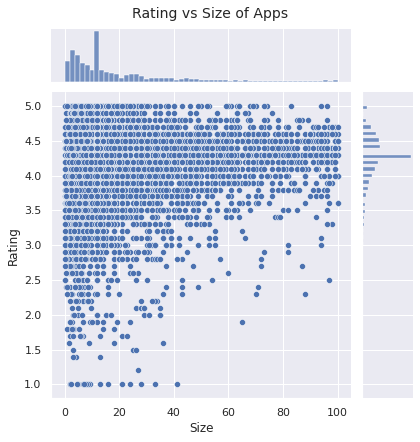

In [44]:
sns.set_style("darkgrid")
ax = sns.jointplot(PS_df['Size'], PS_df['Rating'])
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

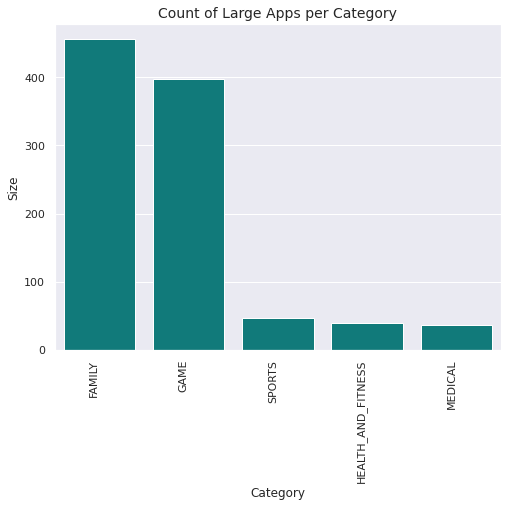

In [ ]:
Large_Apps = PS_df[PS_df["Size"]>40]
group_category = Large_Apps.groupby("Category")["Size"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="Category", y="Size", data=group_category, color = "darkcyan")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Large Apps per Category',size = 14)
plt.savefig("Count_large")

In [ ]:
#TOP Categories

PS_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = PS_df['Category'].value_counts()
y = PS_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

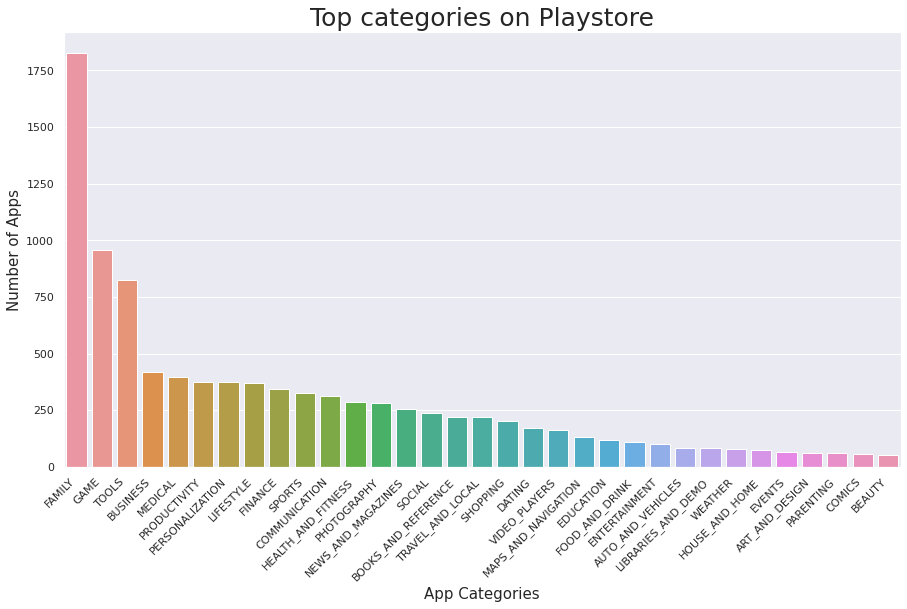

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(15,8))
plt.xlabel('App Categories', size=15)
plt.ylabel('Number of Apps', size=15)
graph = sns.barplot(y = x_list, x = y_list)
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

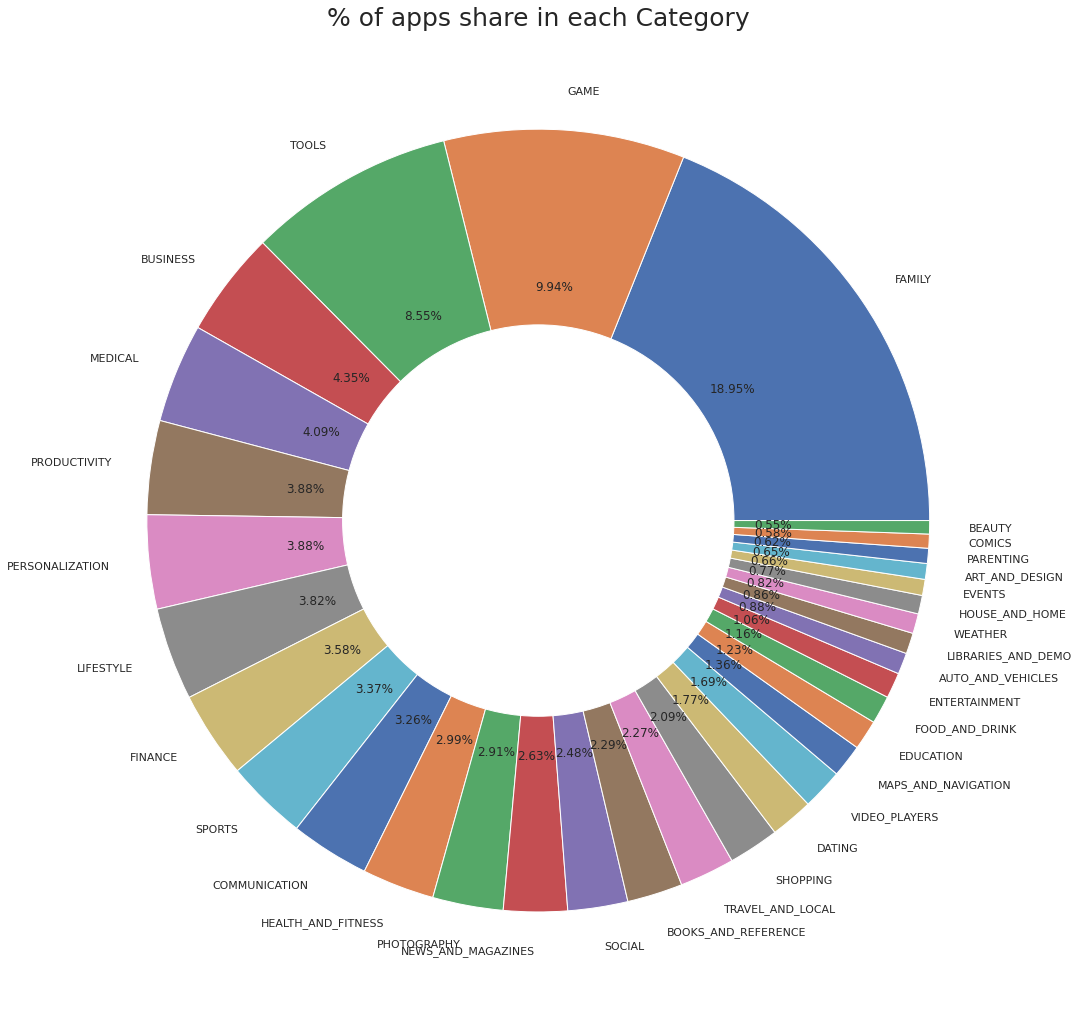

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(PS_df.Category.value_counts(), labels=PS_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

Text(0.5, 1.0, 'Total app installs in each category')

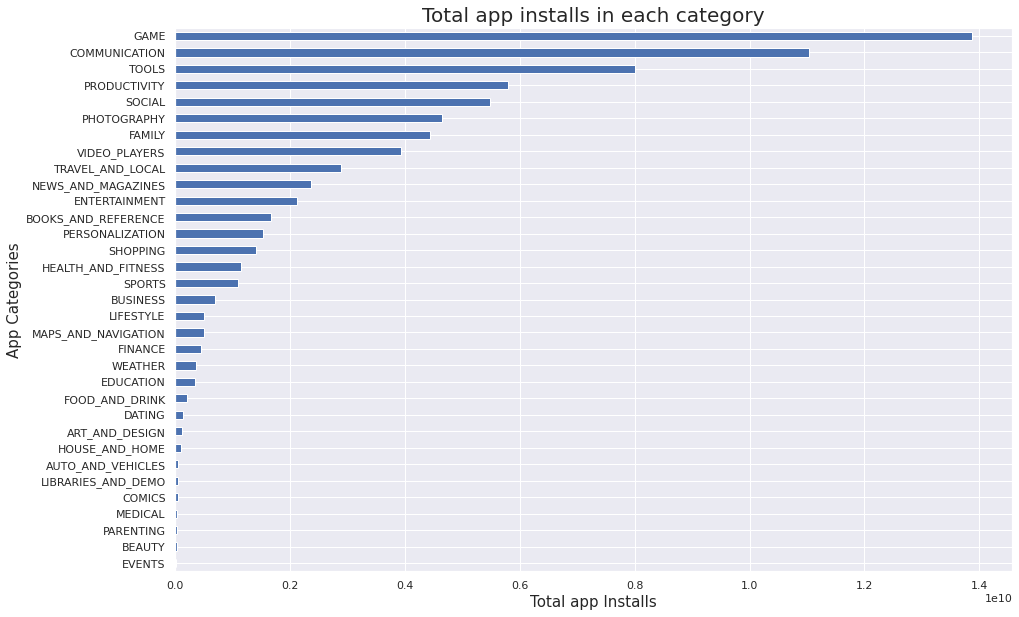

In [ ]:
# total app installs in each category of the play store

a = PS_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'b', )
plt.ylabel('App Categories', fontsize = 15)
plt.xlabel('Total app Installs', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

Text(0.5, 1.0, 'Top 5 Apps with Maximum Reviews')

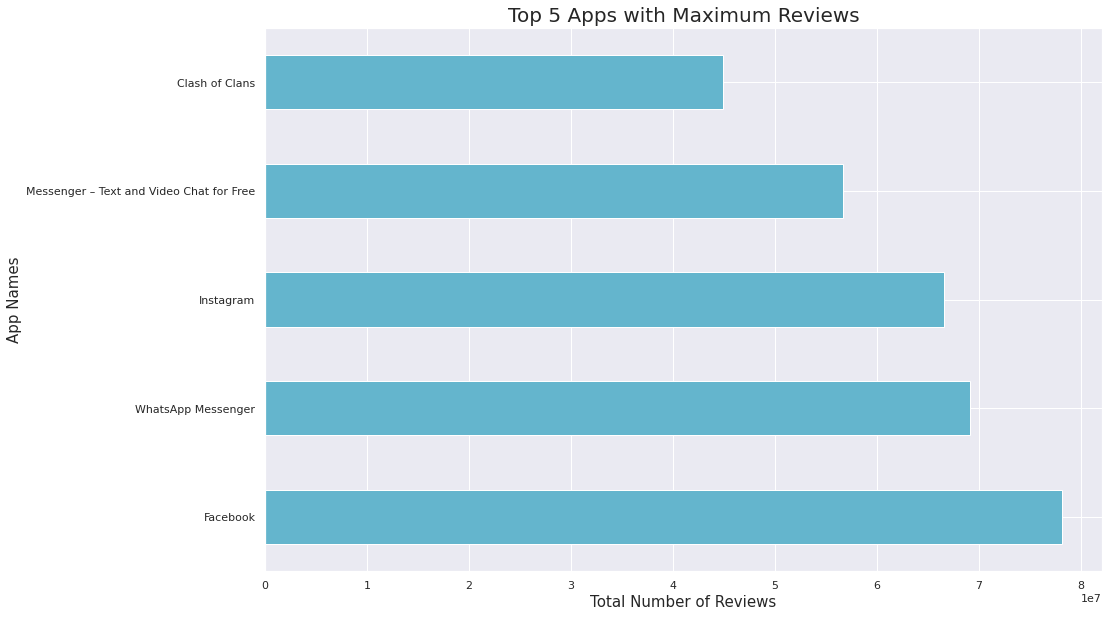

In [ ]:
#Apps with Maximum Reviews
b = PS_df.groupby("App")['Reviews'].sum().sort_values(ascending = False).head()
b.plot.barh(figsize=(15,10), color = 'c' )
plt.ylabel('App Names', fontsize = 15)
plt.xlabel('Total Number of Reviews', fontsize = 15)
plt.xticks()
plt.title('Top 5 Apps with Maximum Reviews', fontsize = 20)

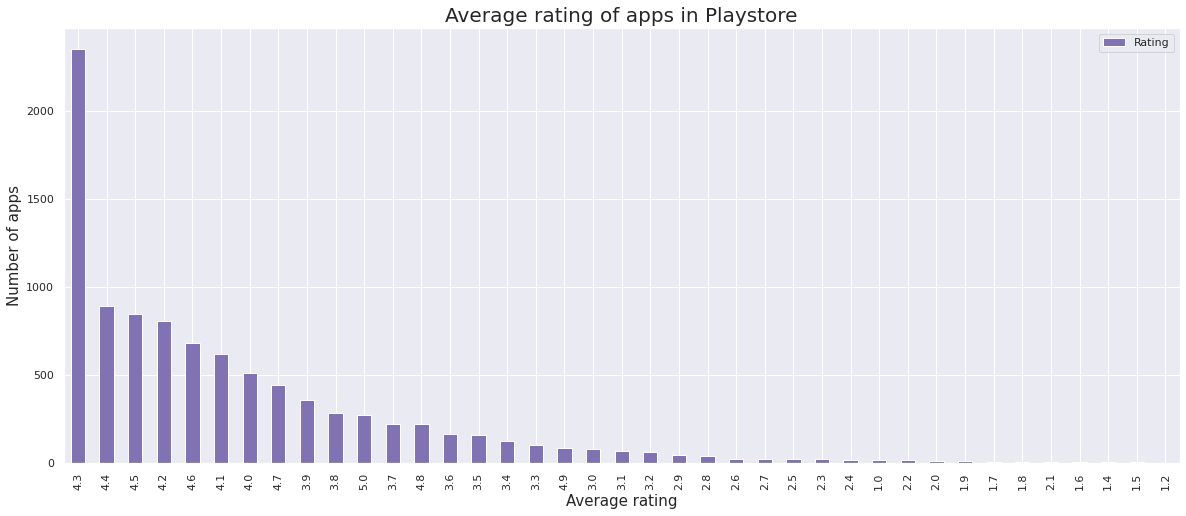

In [ ]:
# Average App Ratings

PS_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

In [ ]:
def Rate_method(Rating):
  if Rating >= 4:
    return "Top Rated"
  elif Rating >= 3 and Rating < 4:
    return "Above Average"
  elif Rating >= 2 and Rating < 3:
    return "Average"
  else:
    return "Below Average" 

In [ ]:
PS_df["Rating_Range"] = PS_df['Rating'].apply(lambda x: Rate_method(x))

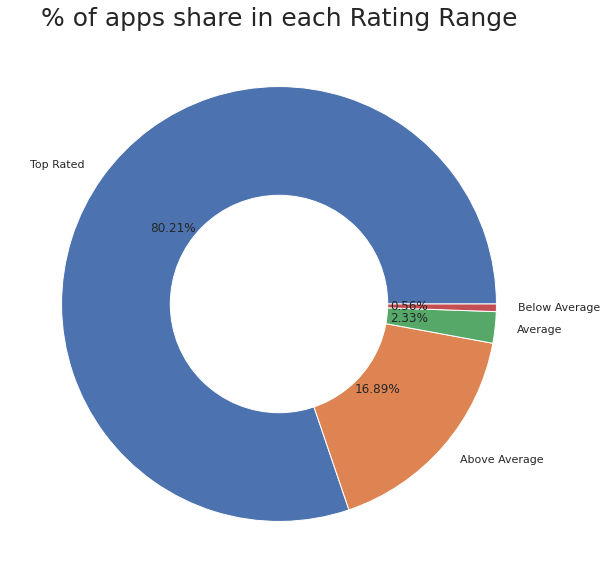

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(PS_df.Rating_Range.value_counts(), labels=PS_df.Rating_Range.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Rating Range', fontsize = 25)
plt.show()

In [ ]:
# Top 10 Apps in any Category

def Top_10_catergory(str):
    str = str.upper()
    top10 = PS_df[PS_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(10,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')


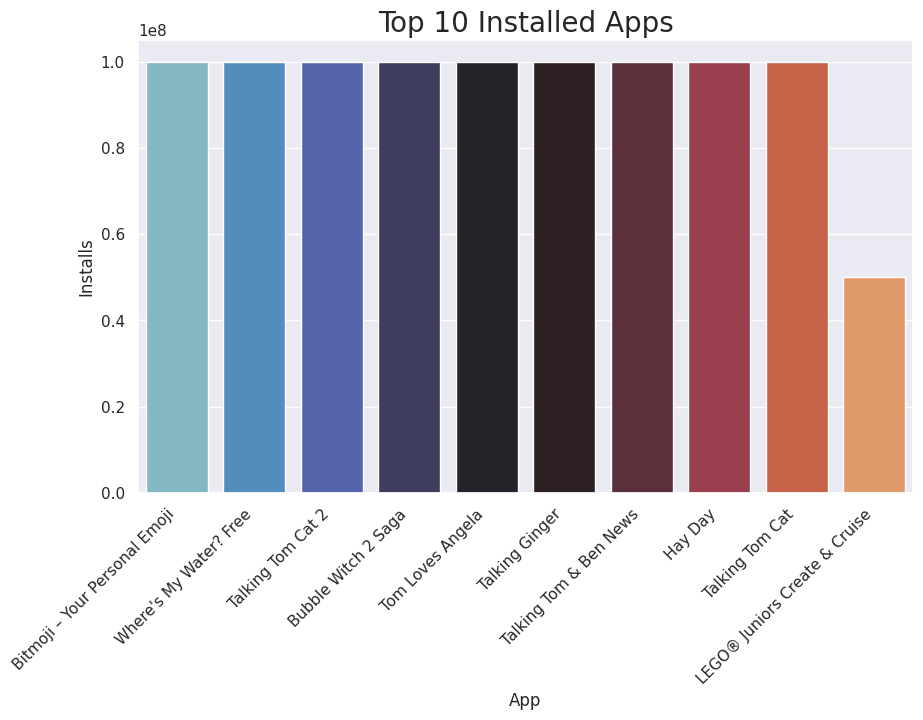

In [ ]:
Top_10_catergory('FAMILY')

In [ ]:
#TOP Free APPS

PS_df_Free = PS_df[PS_df['Type'] == 'Free']

In [ ]:
PS_df_Top_Free = PS_df_Free[PS_df_Free['Installs'] == PS_df_Free['Installs'].max()]
Top_10_free_apps = PS_df_Top_Free.nlargest(10, 'Installs', keep = 'first')
Top_10_free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Range
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,Above Average
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,Top Rated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,Top Rated
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,Top Rated
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,Top Rated
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,Top Rated
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,Top Rated
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,Top Rated
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,Top Rated
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Top Rated


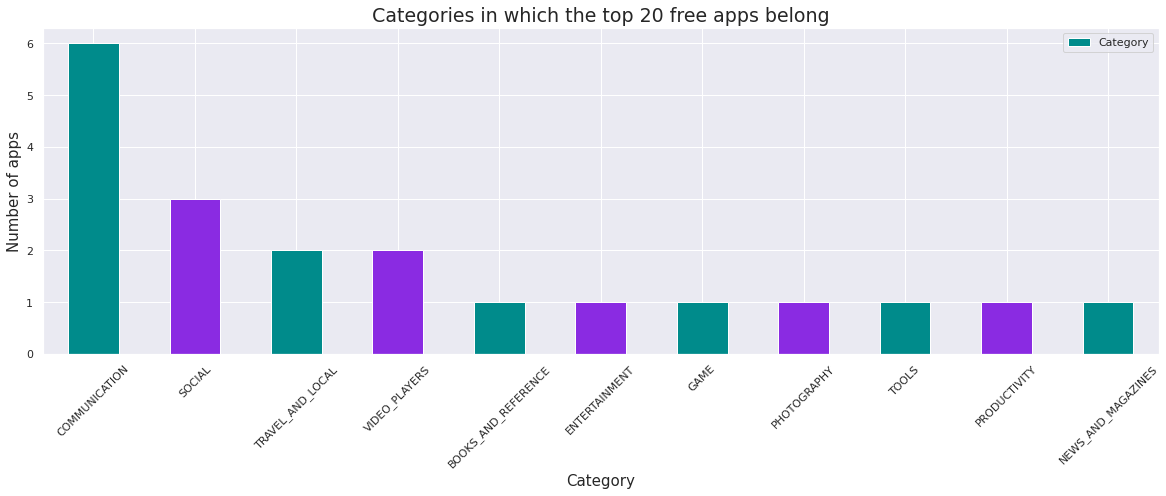

In [ ]:
# Categories in which the top 20 free apps belong to
PS_df_Top_Free['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

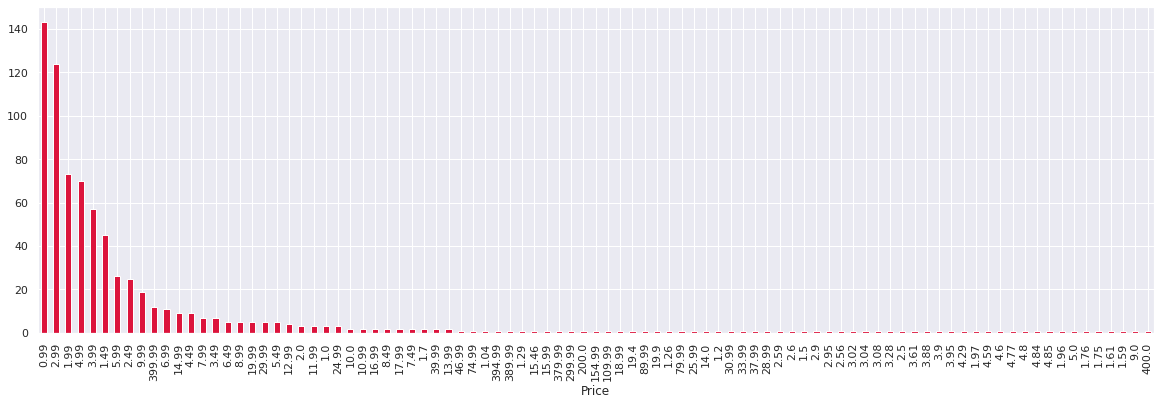

In [ ]:
# Creating a df containing only paid apps
paid_df=PS_df[PS_df['Type']=='Paid']
# Number of apps that can be installed at a particular price 

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

In [ ]:
# Creatng a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Range,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,Top Rated,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,Top Rated,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,Top Rated,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,Top Rated,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,Average,6990.0


In [ ]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Range,Revenue
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,Top Rated,69900000.0


In [ ]:
# Top 10 paid apps in the play store
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

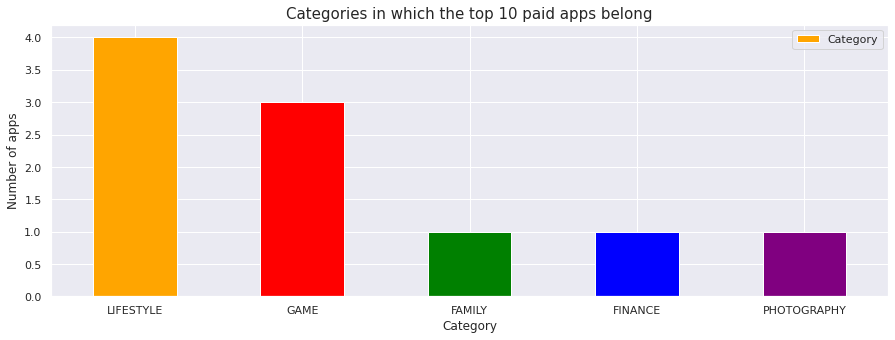

In [ ]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


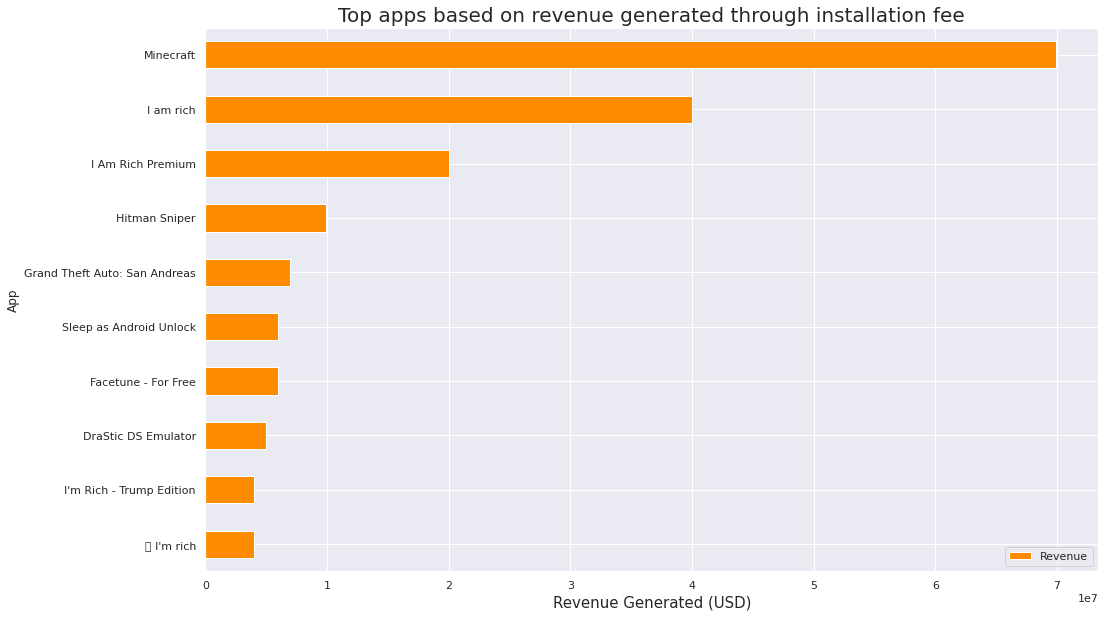

In [ ]:
# Top paid apps according to the revenue generated through installs alone
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='darkorange')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()


## **Percentage of Review Sentiments**



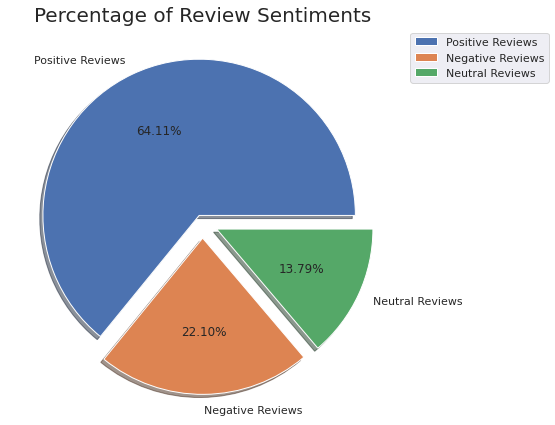

In [ ]:
import matplotlib as mpl
count = list(UR_df['Sentiment'].value_counts())
categories_ = 'Positive Reviews', 'Negative Reviews', 'Neutral Reviews'
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (7,12)
plt.pie(count, labels=categories_, explode=[0.05, 0.10, 0.10], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

In [ ]:
UR_df_positive = UR_df[UR_df["Sentiment"] == 'Positive']
UR_df_positive.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
UR_df_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23998 entries, 0 to 64227
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     23998 non-null  object 
 1   Translated_Review       23998 non-null  object 
 2   Sentiment               23998 non-null  object 
 3   Sentiment_Polarity      23998 non-null  float64
 4   Sentiment_Subjectivity  23998 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


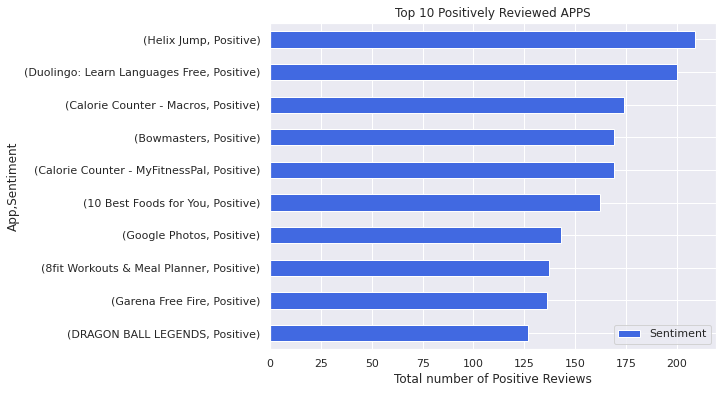

In [ ]:
Pos_data = UR_df_positive.groupby('App')['Sentiment'].value_counts().nlargest(10)

Pos_data.plot.barh(figsize = (8,6), color = 'royalblue').invert_yaxis()
plt.title("Top 10 Positively Reviewed APPS")
plt.xlabel('Total number of Positive Reviews')
plt.legend()

In [ ]:
UR_df_negative = UR_df[UR_df["Sentiment"] == 'Negative']
UR_df_negative.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [ ]:
UR_df_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8271 entries, 32 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     8271 non-null   object 
 1   Translated_Review       8271 non-null   object 
 2   Sentiment               8271 non-null   object 
 3   Sentiment_Polarity      8271 non-null   float64
 4   Sentiment_Subjectivity  8271 non-null   float64
dtypes: float64(2), object(3)
memory usage: 387.7+ KB


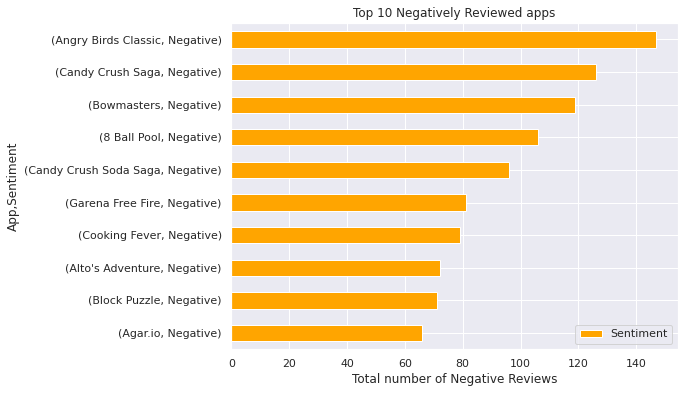

In [ ]:
Neg_data = UR_df_negative.groupby('App')['Sentiment'].value_counts().nlargest(10)

Neg_data.plot.barh(figsize = (8,6), color = 'orange').invert_yaxis()
plt.title("Top 10 Negatively Reviewed apps")
plt.xlabel('Total number of Negative Reviews')
plt.legend()

In [ ]:
UR_df_neutral = UR_df[UR_df["Sentiment"] == 'Neutral']
UR_df_neutral.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0


In [ ]:
UR_df_neutral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 8 to 64218
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     5163 non-null   object 
 1   Translated_Review       5158 non-null   object 
 2   Sentiment               5163 non-null   object 
 3   Sentiment_Polarity      5163 non-null   float64
 4   Sentiment_Subjectivity  5163 non-null   float64
dtypes: float64(2), object(3)
memory usage: 242.0+ KB


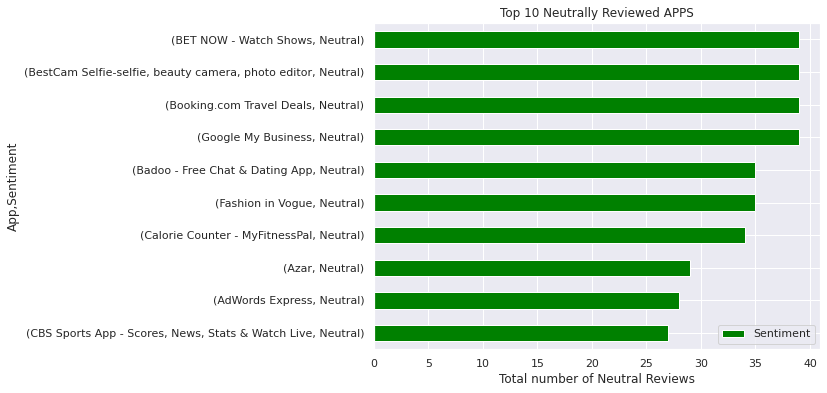

In [ ]:
Neu_data = UR_df_neutral.groupby('App')['Sentiment'].value_counts().nlargest(10)

Neu_data.plot.barh(figsize = (8,6), color = 'green').invert_yaxis()
plt.title("Top 10 Neutrally Reviewed APPS")
plt.xlabel('Total number of Neutral Reviews')
plt.legend()

In [ ]:
UR_df['Sentiment_Subjectivity'].value_counts()

0.000000    4416
1.000000    1749
0.500000    1647
0.600000    1166
0.750000    1140
            ... 
0.616909       1
0.234848       1
0.154762       1
0.591146       1
0.259470       1
Name: Sentiment_Subjectivity, Length: 4474, dtype: int64

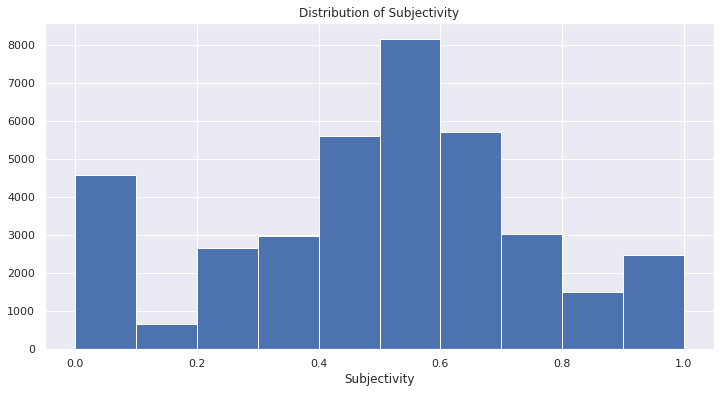

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(UR_df[UR_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

Is sentiment_subjectivity proportional to sentiment_polarity?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


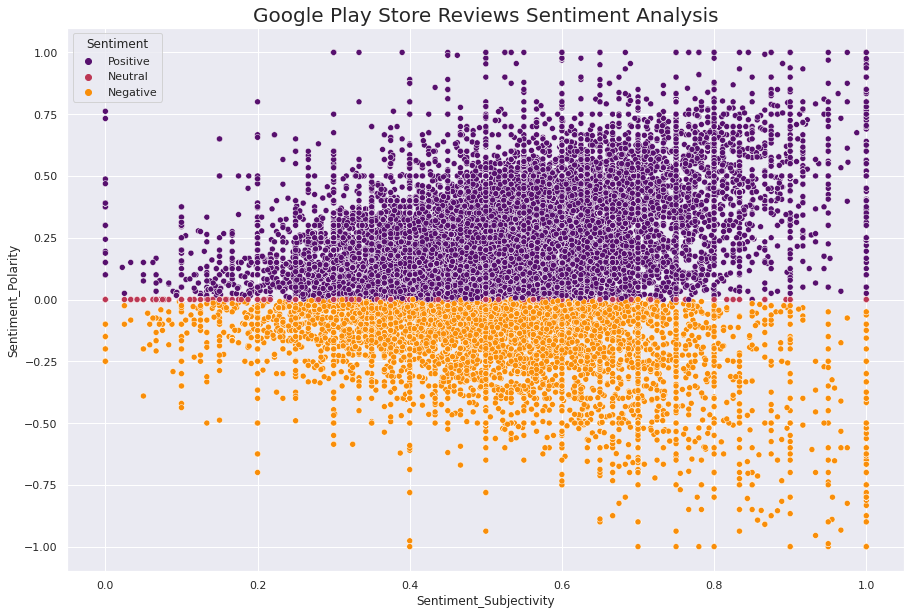

In [ ]:
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(UR_df['Sentiment_Subjectivity'], UR_df['Sentiment_Polarity'],
                hue = UR_df['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

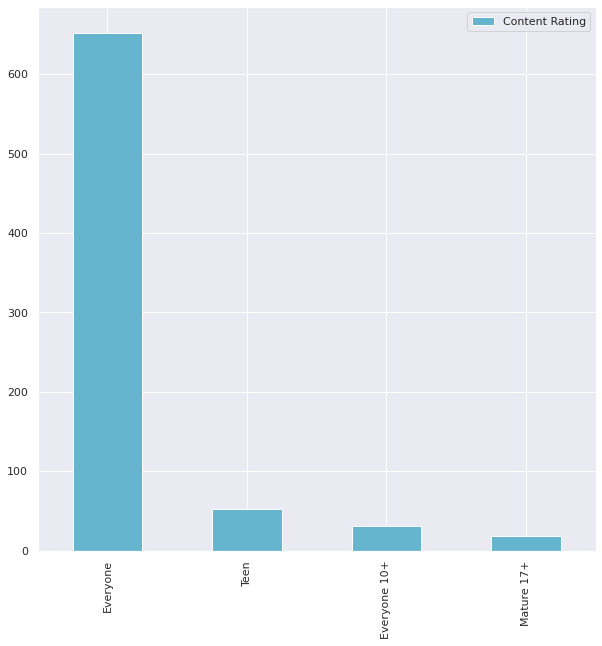

In [ ]:
paid_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='c')
plt.legend()

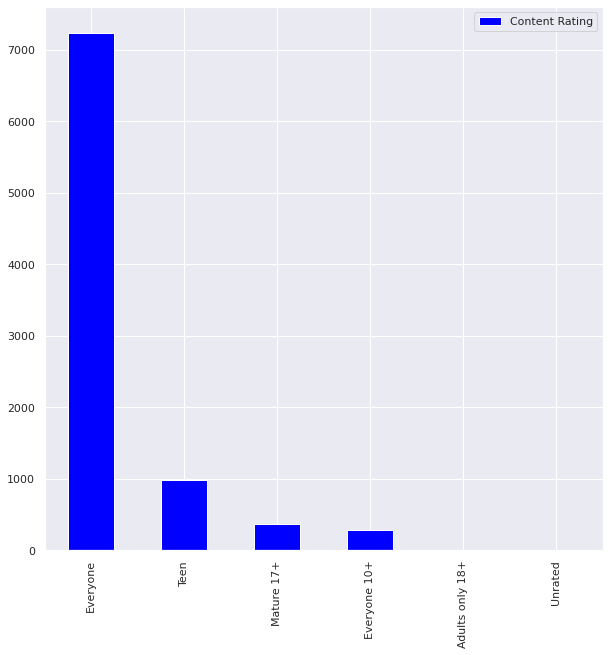

In [ ]:
PS_df_Free['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='blue')
plt.legend()

In [ ]:
merged_df = PS_df.merge(UR_df, on = "App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Range,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Above Average,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Above Average,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Above Average,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Above Average,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Above Average,I love colors inspyering,Positive,0.500,0.600000


In [ ]:
merged_df = merged_df.dropna(subset=['Translated_Review'])

In [ ]:
## let's see the distribution of postive, neg reviews in each category
sentiment_count = merged_df.groupby(["Category","Sentiment"]).agg({'App': 'count'}).reset_index()
sentiment_sum =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
print(sentiment_sum.head())
print(sentiment_count.head())

              Category  Sentiment
0       ART_AND_DESIGN        382
1    AUTO_AND_VEHICLES        289
2               BEAUTY        338
3  BOOKS_AND_REFERENCE        651
4             BUSINESS       1082
            Category Sentiment  App
0     ART_AND_DESIGN  Negative   61
1     ART_AND_DESIGN   Neutral   62
2     ART_AND_DESIGN  Positive  259
3  AUTO_AND_VEHICLES  Negative   17
4  AUTO_AND_VEHICLES   Neutral   36


In [ ]:
## we need to normalize it before plotting
new_df = sentiment_count.merge(sentiment_sum, on = "Category")
new_df["normalized_sentiment_counts"] = new_df["App"]/new_df["Sentiment_y"]
new_df.head()

,Category,Sentiment_x,App,Sentiment_y,normalized_sentiment_counts
0,ART_AND_DESIGN,Negative,61,382,0.159686
1,ART_AND_DESIGN,Neutral,62,382,0.162304
2,ART_AND_DESIGN,Positive,259,382,0.678010
3,AUTO_AND_VEHICLES,Negative,17,289,0.058824
4,AUTO_AND_VEHICLES,Neutral,36,289,0.124567


In [ ]:
sentiment_count_2 = merged_df.groupby(["Category","Sentiment","Installs"]).agg({'App': 'count'}).reset_index()
sentiment_sum_2 =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
sentiment_count_2.head()

,Category,Sentiment,Installs,App
0,ART_AND_DESIGN,Negative,100000,23
1,ART_AND_DESIGN,Negative,500000,22
2,ART_AND_DESIGN,Negative,1000000,10
3,ART_AND_DESIGN,Negative,5000000,3
4,ART_AND_DESIGN,Negative,10000000,3


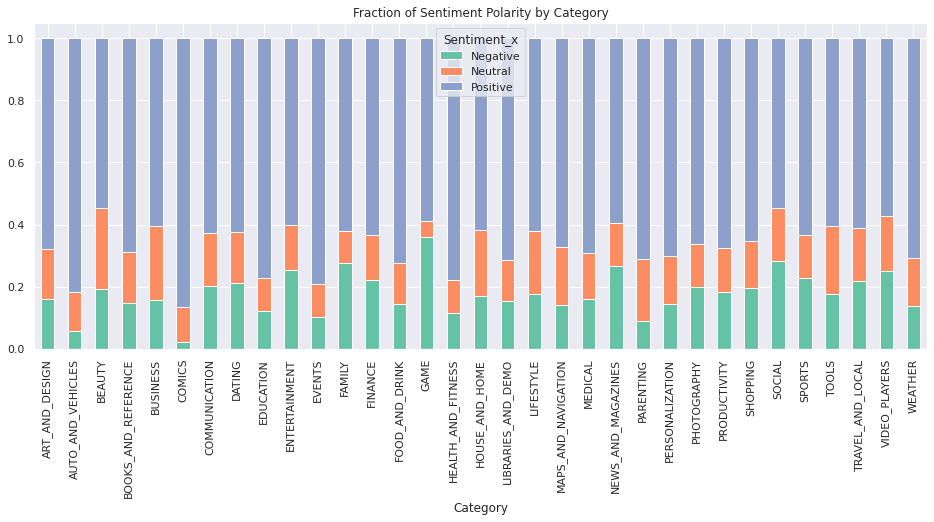

In [ ]:
new_df_stack = new_df.pivot(index='Category', columns='Sentiment_x', values='normalized_sentiment_counts')
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
sns.set(palette="Set2")
new_df_stack.plot(kind='bar', stacked = True)
plt.title("Fraction of Sentiment Polarity by Category")
plt.savefig("sentiment_dist.svg", format='svg', dpi=1200)

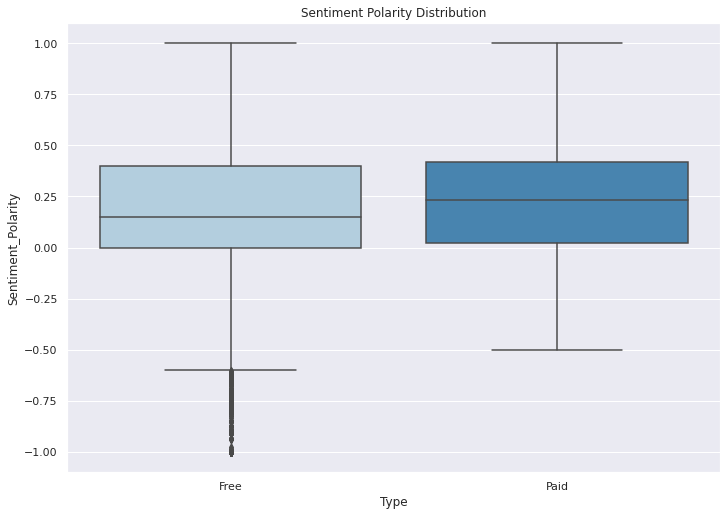

In [ ]:
## sentiment polarity and free/paid apps
#sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')